In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

import pathlib
import shutil
import tempfile

import tensorflow as tf

In [4]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

# Training

Command used:

```
CUDA_VISIBLE_DEVICES=0 python src/models/train_model.py --epochs 100 --batch_size 64 --model_dir models --train data/processed/Tomato
```

In [5]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
from src.data import io
from src.models.train_model import train, load_dataset

In [7]:
metadata = io.read_metadata("../data/processed/Corn/metadata.json")
model_id = metadata["id"]

In [8]:
model_dir = pathlib.Path("../models")
train_dir = pathlib.Path("../data/processed/Corn/")
batch_size = 32
epochs = 20
monitor = "val_loss"

In [15]:
classifier, history, model_id = train(str(train_dir), str(model_dir), batch_size, epochs, monitor)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)       

In [16]:
history.history

{'loss': [1.1522738762358402,
  0.3355984735362073,
  0.2780681878645369,
  0.21121011991450128,
  0.18765907885229333,
  0.16363774390613778,
  0.1319883023289607,
  0.08671847464358236,
  0.05221125464192889,
  0.05106533243954974,
  0.0664932213901998],
 'accuracy': [0.72539896,
  0.8537234,
  0.875,
  0.90890956,
  0.92420214,
  0.9368351,
  0.9481383,
  0.9674202,
  0.98670214,
  0.9807181,
  0.9773936],
 'val_loss': [0.40947218934694923,
  0.3293895016113917,
  0.21330793350934982,
  0.19521627376476924,
  0.2538471964498361,
  0.18412445187568666,
  0.23455418447653453,
  0.2551390337447325,
  0.261472500115633,
  0.2610121321243544,
  0.28899214963118236],
 'val_accuracy': [0.84791666,
  0.84583336,
  0.90625,
  0.9125,
  0.88125,
  0.9166667,
  0.90833336,
  0.91041666,
  0.92083335,
  0.92291665,
  0.9166667]}

In [17]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)

In [24]:
histories = {"Corn": history}

In [26]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ValueError: x and y must have same first dimension, but have shapes (11,) and (81,)

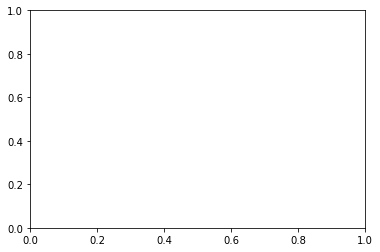

In [25]:
plotter.plot(histories)

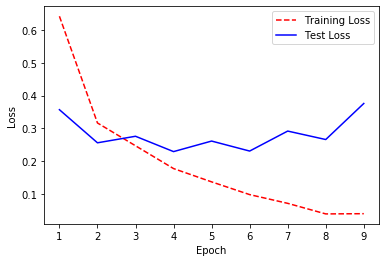

In [30]:
# https://chrisalbon.com/deep_learning/keras/visualize_loss_history/

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

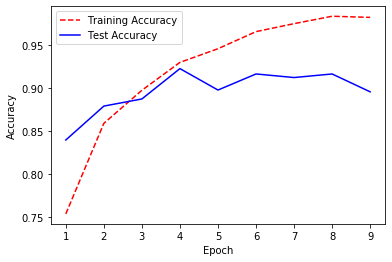

In [31]:
# https://chrisalbon.com/deep_learning/keras/visualize_loss_history/

# Get training and test loss histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

# Evaluation - Top Model

- **MODEL_ID** `9d01c36a-5654-4858-8343-e9b923b9bfc5`
- **EPOCH** `7`

On training and cross-validation datasets:

```
loss: 0.1227 - accuracy: 0.9583 - val_loss: 0.2684 - val_accuracy: 0.9219
```

On test dataset:

```
loss: 0.2630712818354368 - accuracy: 0.92578125 
```

In [22]:
for model_path in model_dir.glob("*.h5"):
    model_file_path = str(model_path)
    print(model_path.parent.name, model_path.name)
    model = tf.keras.models.load_model(model_file_path)
    loss, acc = evaluate(model, test_dataset, batch_size, metadata["file_counts"]["test"])
    print("loss:", loss, "-", "accuracy:", acc, "\n")

9d01c36a-5654-4858-8343-e9b923b9bfc5 3.h5
loss: 0.33715570425348623 - accuracy: 0.8844866 

9d01c36a-5654-4858-8343-e9b923b9bfc5 7.h5
loss: 0.2630712818354368 - accuracy: 0.92578125 

9d01c36a-5654-4858-8343-e9b923b9bfc5 final.h5
loss: 0.361284109630755 - accuracy: 0.91657364 

9d01c36a-5654-4858-8343-e9b923b9bfc5 2.h5
loss: 0.43175008893013 - accuracy: 0.8523995 

9d01c36a-5654-4858-8343-e9b923b9bfc5 1.h5
loss: 0.5357408262789249 - accuracy: 0.82561386 

9d01c36a-5654-4858-8343-e9b923b9bfc5 6.h5
loss: 0.3111253138631582 - accuracy: 0.906808 

